# About Dataset

## Features
1. **ID**
2. **Customer ID**
3. **Month**: Represents the month of the year
4. **Name**: Represents the name of a person
5. **Age**: Represents the age of the person
6. **SSN**: Represents the social security number of a person
7. **Occupation**: Represents the occupation of the person
8. **Annual_Income**: Represents the annual income of the person
9. **Monthly_Inhand_Salary**: Represents the monthly base salary of a person
10. **Num_Bank_Accounts**: Represents the number of bank accounts a person holds
11. **Num_Credit_Card**: Represents the number of other credit cards held by a person
12. **Interest_Rate**: Represents the interest rate on credit card
13. **Num_of_Loan**: Represents the number of loans taken from the bank
14. **Type_of_Loan**: Represents the types of loan taken by a person
15. **Delay_from_due_date**: Represents the average number of days delayed from the payment date
16. **Num_of_Delayed_Payment**: Represents the average number of payments delayed by a person
17. **Changed_Credit_Limit**: Represents the percentage change in credit card limit
18. **Num_Credit_Inquiries**: Represents the number of credit card inquiries
19. **Credit_Mix**: Represents the classification of the mix of credits
20. **Outstanding_Debt**: Represents the remaining debt to be paid (in USD)
21. **Credit_Utilization_Ratio**: Represents the utilization ratio of credit card
22. **Credit_History_Age**: Represents the age of credit history of the person
23. **Payment_of_Min_Amount**: Represents whether only the minimum amount was paid by the person
24. **Total_EMI_per_month**: Represents the monthly EMI payments (in USD)
25. **Amount_invested_monthly**: Represents the monthly amount invested by the customer (in USD)
26. **Payment_Behaviour**: Represents the payment behavior of the customer (in USD)
27. **Monthly_Balance**: Represents the monthly balance amount of the customer (in USD)


## Problem Statemen
You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

## Task
Given a person’s credit-related information, build a machine learning model that can classify the credit score.

# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 , f_classif

import optuna

# Read The Data

In [2]:
df = pd.read_csv("data/train.csv")

In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


# Check of Data

In [4]:
df.shape

(100000, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df["Credit_Score"].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [9]:
df.drop(["ID", "Customer_ID", "Name", "SSN"], axis=1, inplace=True)

# EDA

<Axes: >

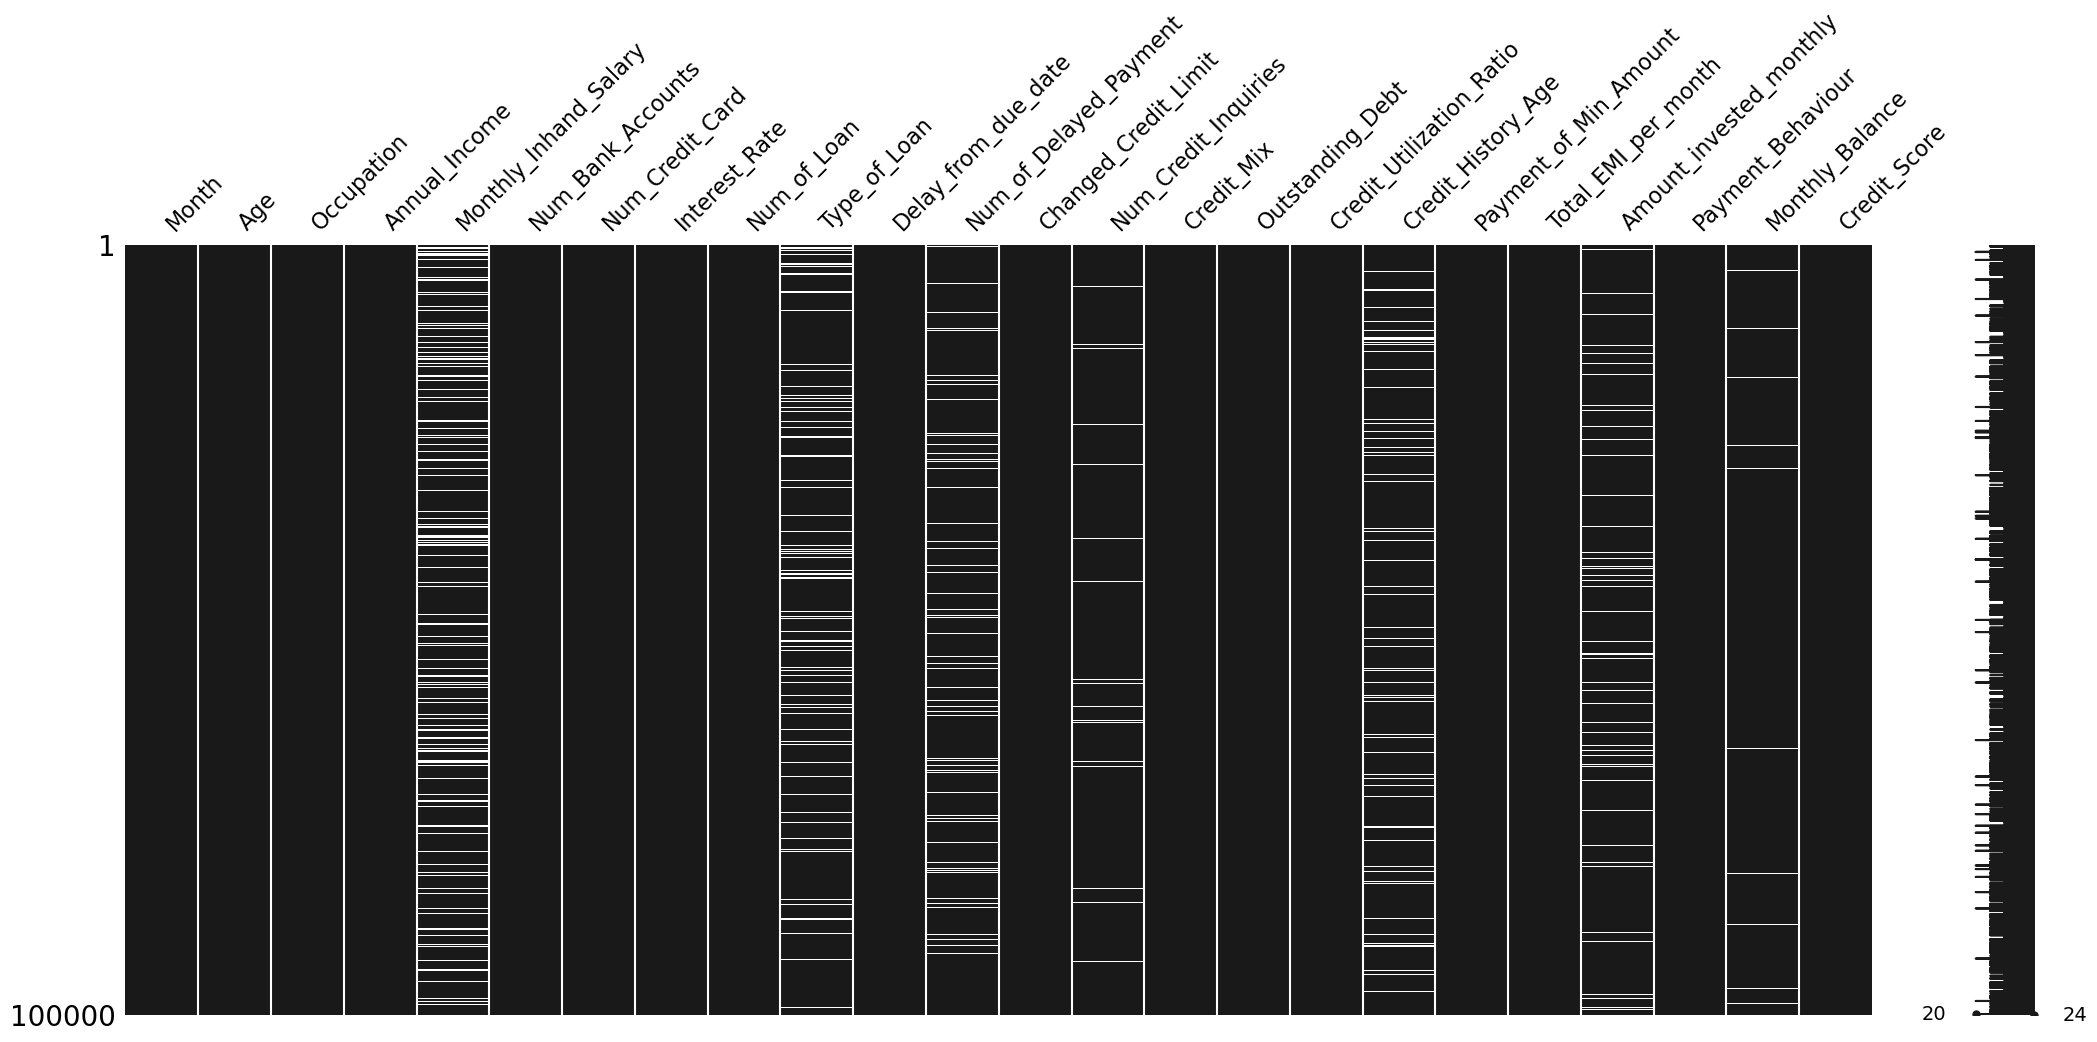

In [10]:
msno.matrix(df, color=(0.1, 0.1, 0.1))

In [11]:
des = df.describe().transpose()
des.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.000000,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.000000,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.000000,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.000000,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.000000,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.000000,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.000000,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.000000,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


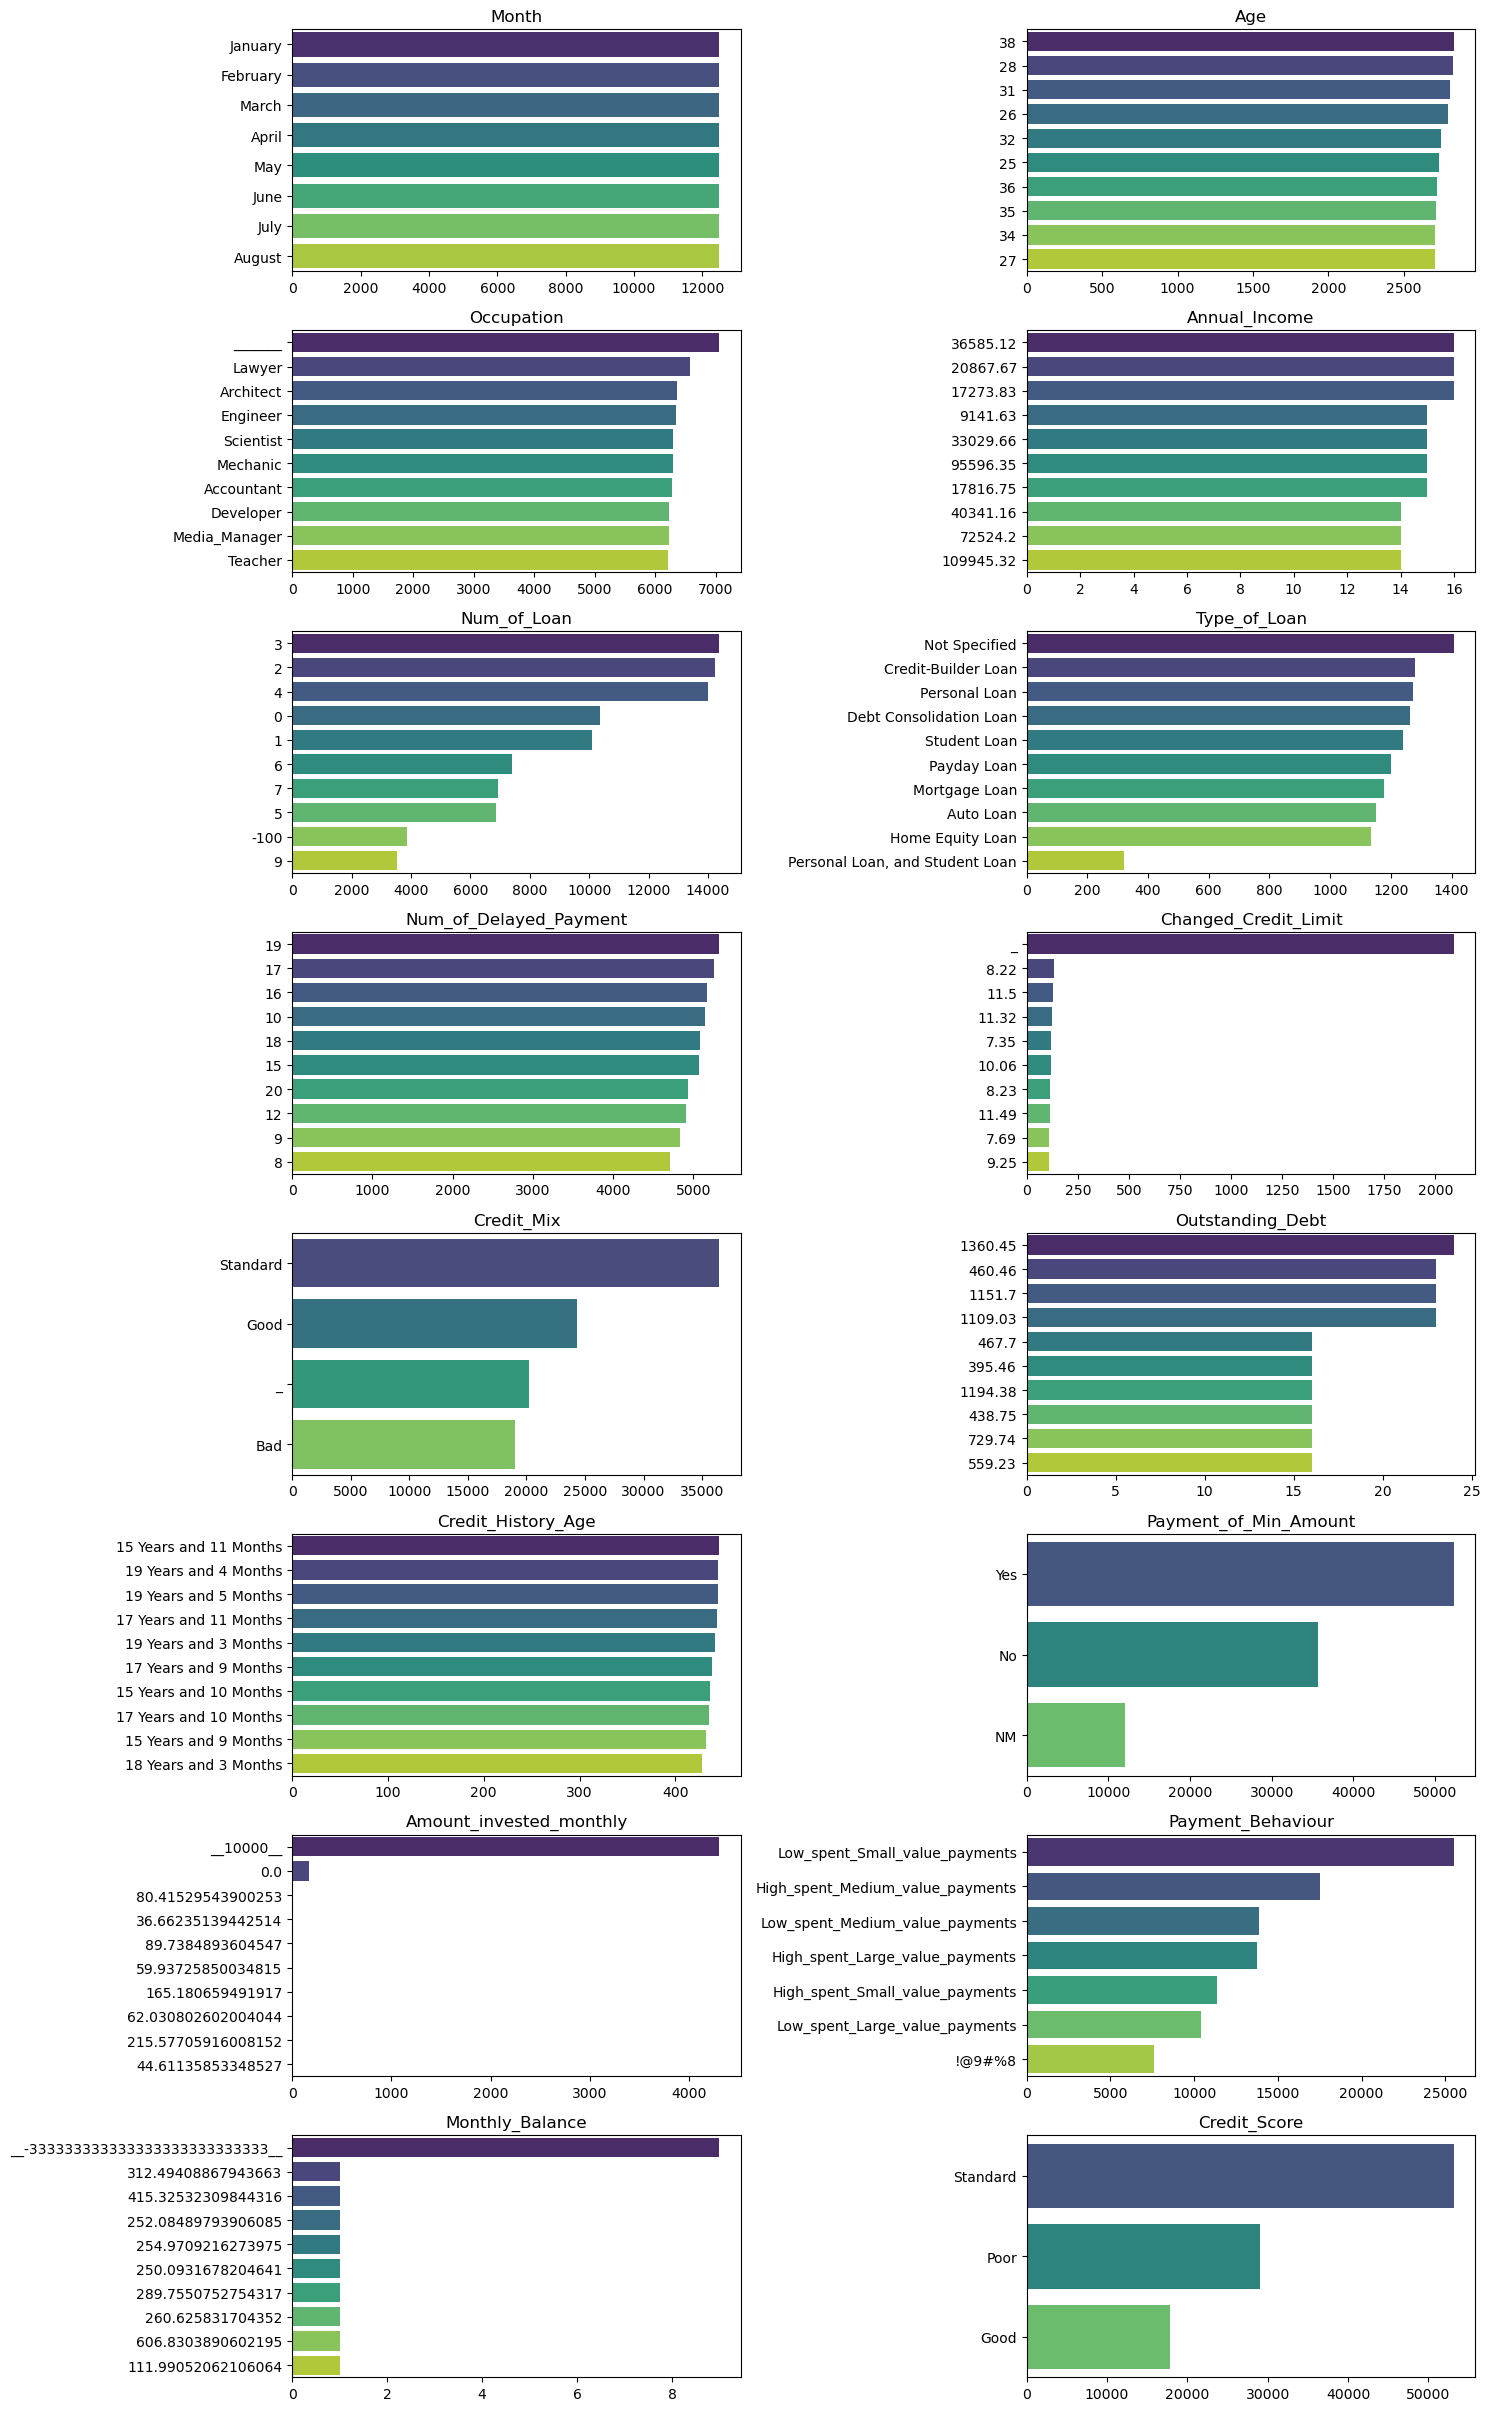

In [12]:
plt.figure(figsize=(15, 30))
for i, feature in enumerate(df.select_dtypes(include="object").columns):
    counts = df[feature].value_counts().head(10)
    plt.subplot(10, 2, i+1)
    sns.barplot(x=counts.values, y=counts.index, palette='viridis')
    plt.title(f"{feature}")
    plt.ylabel('')
plt.tight_layout()

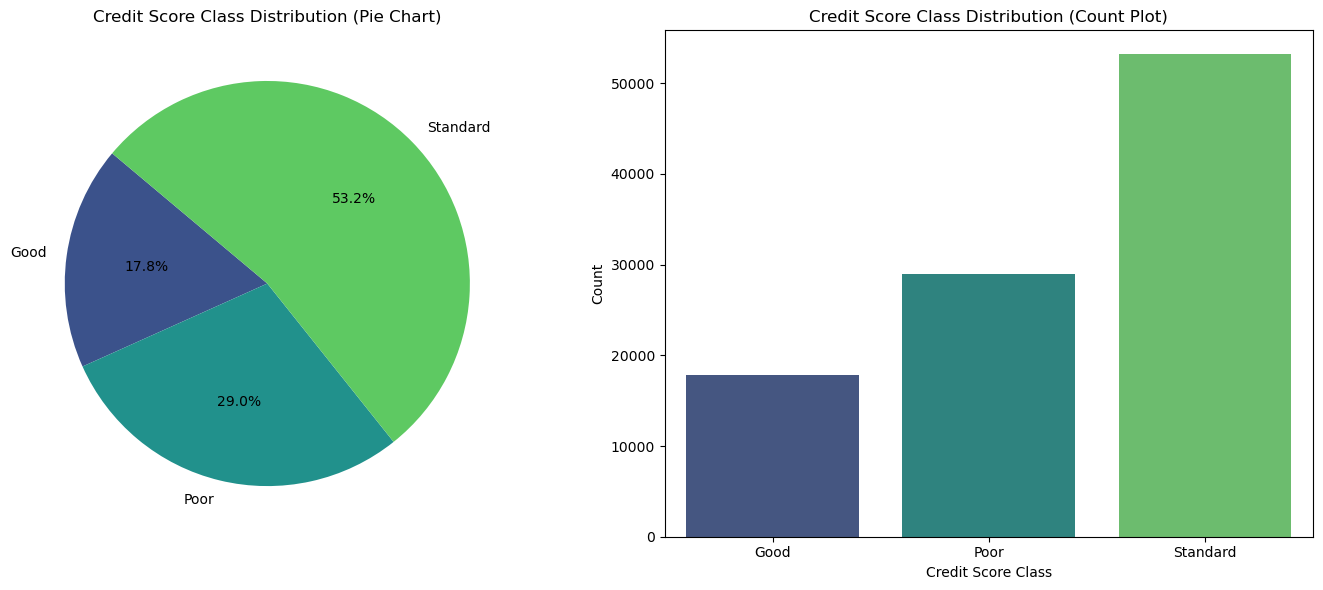

In [13]:
target_counts = df['Credit_Score'].value_counts().sort_index()

palette = sns.color_palette("viridis", n_colors=len(target_counts))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140, colors=palette)
ax1.set_title('Credit Score Class Distribution (Pie Chart)')
sns.countplot(x='Credit_Score', data=df, ax=ax2, palette=palette, order=target_counts.index)
ax2.set_title('Credit Score Class Distribution (Count Plot)')
ax2.set_xlabel('Credit Score Class')
ax2.set_ylabel('Count')
plt.tight_layout()
plt.show()

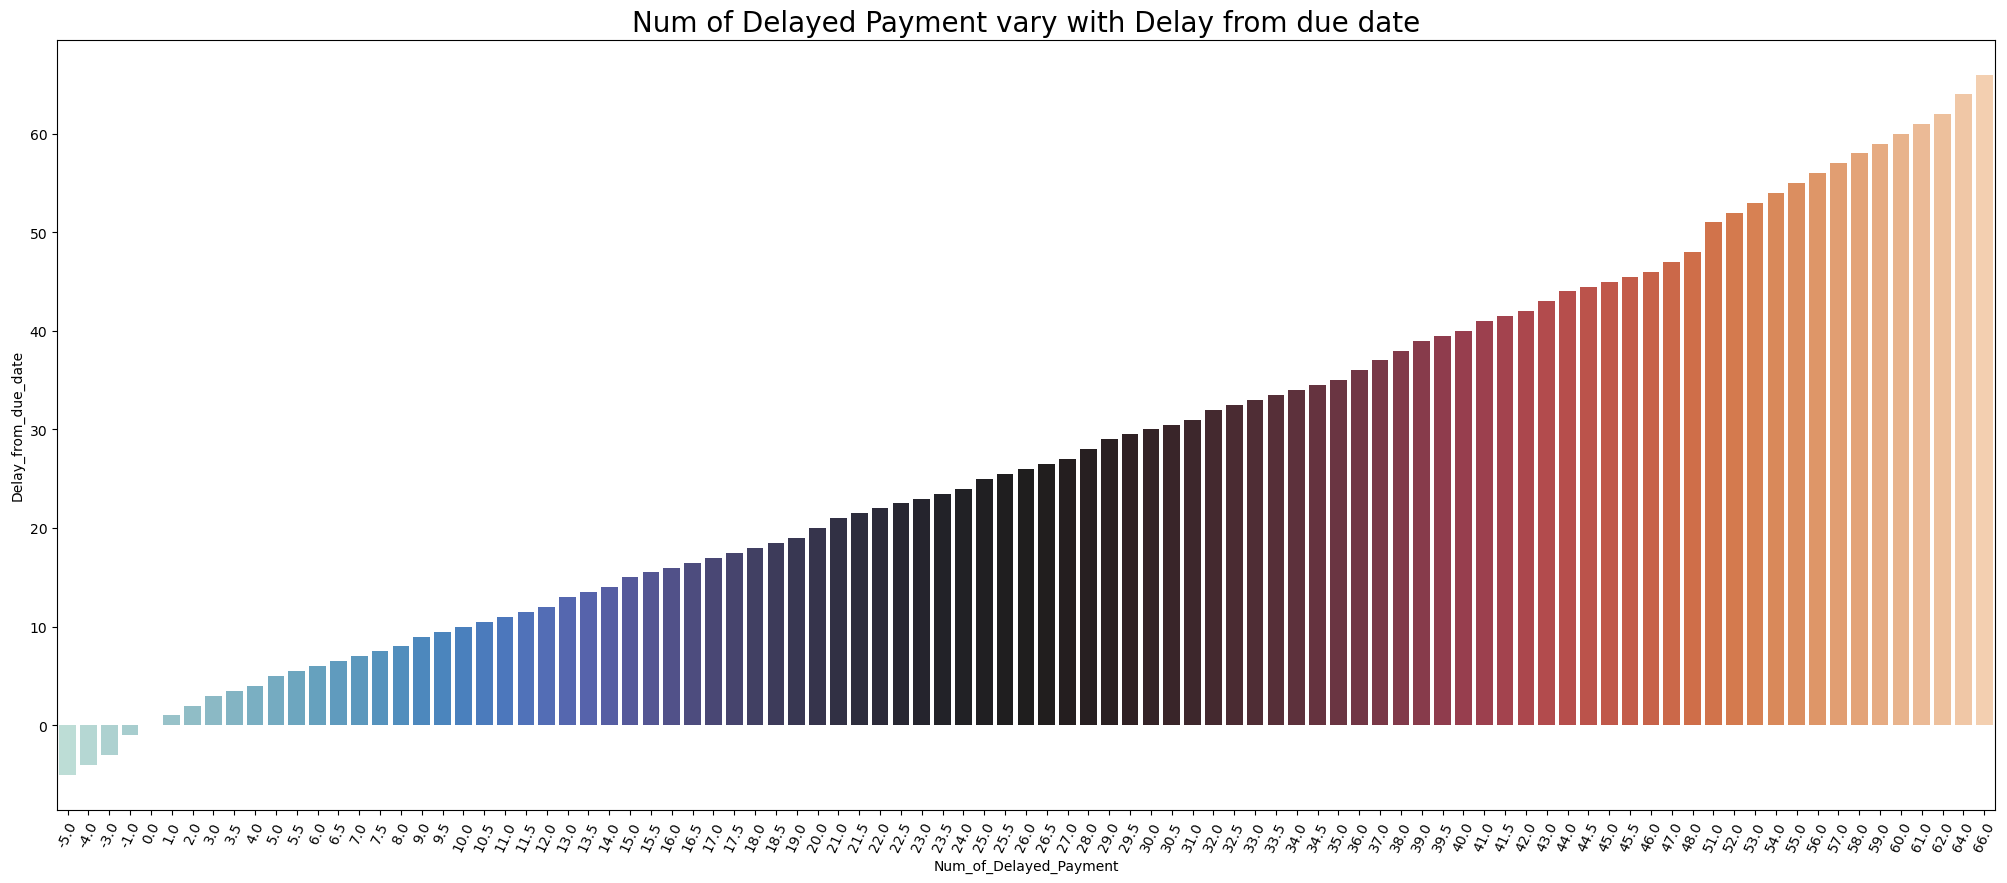

In [14]:
#How Num of Delayed Payment vary with Delay from due date
income_with_age = df.groupby("Num_of_Delayed_Payment")["Delay_from_due_date"].median()

plt.figure(figsize=(25, 10))
sns.barplot(x=income_with_age, y=income_with_age.values, palette='icefire')
plt.title("Num of Delayed Payment vary with Delay from due date", fontsize=20)
plt.xlabel("Num_of_Delayed_Payment")
plt.ylabel("Delay_from_due_date")
plt.xticks(rotation=65)
plt.show()

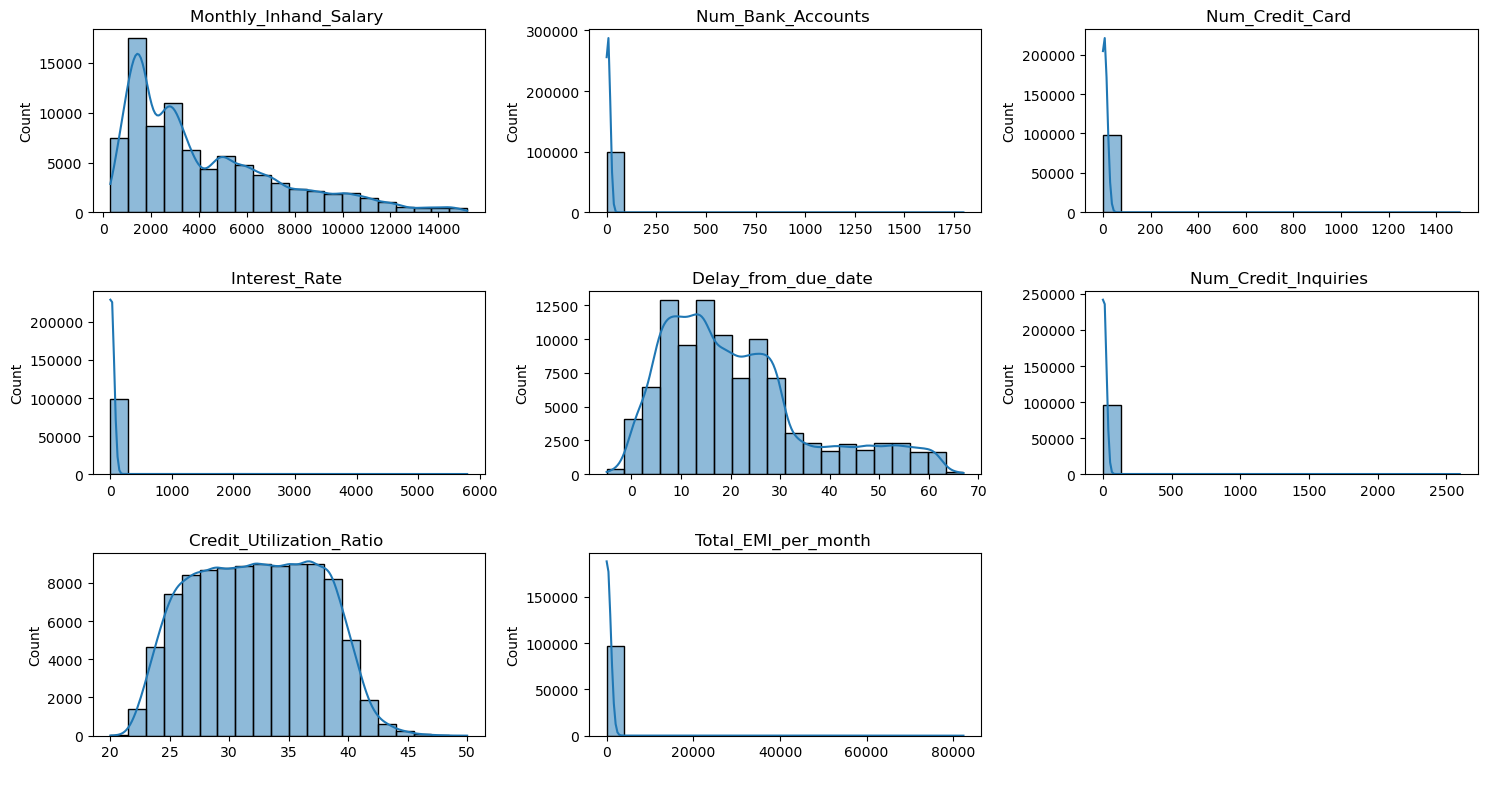

In [15]:
plt.figure(figsize=(15, 8))
for i, feature in enumerate(df.select_dtypes(include="number").columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=df, x=feature, kde=True, bins=20)
    plt.title(f'{feature} ')
    plt.xlabel(' ')
plt.tight_layout()

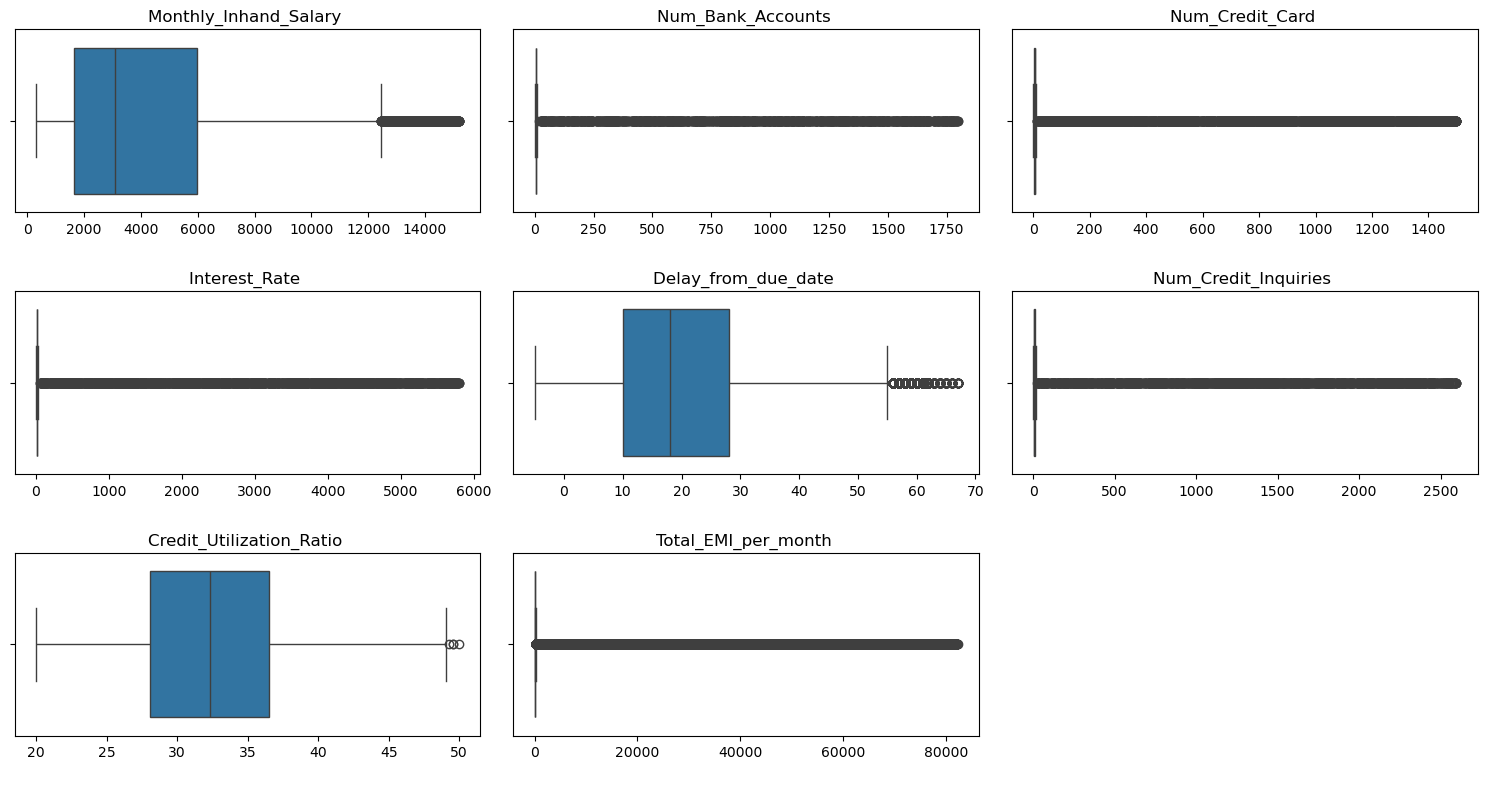

In [16]:
plt.figure(figsize=(15, 8))
for i, feature in enumerate(df.select_dtypes(include="number").columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, x=feature)
    plt.title(f'{feature} ')
    plt.xlabel(' ')
plt.tight_layout()

# Missing Values Treatment

In [17]:
df["Monthly_Inhand_Salary"] = df["Monthly_Inhand_Salary"].fillna(df["Monthly_Inhand_Salary"].median())
df["Type_of_Loan"] = df["Type_of_Loan"].fillna("Not Specified")
df["Num_Credit_Inquiries"] = df["Num_Credit_Inquiries"].fillna(df["Num_Credit_Inquiries"].median())
df["Credit_History_Age"] = df["Credit_History_Age"].fillna("Not Specified")

In [18]:
columns_to_convert = ["Age", "Annual_Income", "Num_of_Loan", "Num_of_Delayed_Payment", 
                      "Changed_Credit_Limit", "Outstanding_Debt", 
                      "Amount_invested_monthly", "Monthly_Balance"]

def clean_and_convert(val):
    if isinstance(val, str):
        # Use re to remove any character that is not a digit
        val = re.sub(r'[^\d]', '', val)
        return int(val) if val.isdigit() else None
    return val

for col in columns_to_convert:
    df[col] = df[col].apply(clean_and_convert)

df[columns_to_convert] = df[columns_to_convert].astype('float64')

print(df.dtypes)

Month                        object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object


In [19]:
df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].fillna(df["Num_of_Delayed_Payment"].median())
df["Changed_Credit_Limit"] = df["Changed_Credit_Limit"].fillna(df["Changed_Credit_Limit"].median())
df["Amount_invested_monthly"] = df["Amount_invested_monthly"].fillna(df["Amount_invested_monthly"].median())
df["Monthly_Balance"] = df["Monthly_Balance"].fillna(df["Monthly_Balance"].median())

<Axes: >

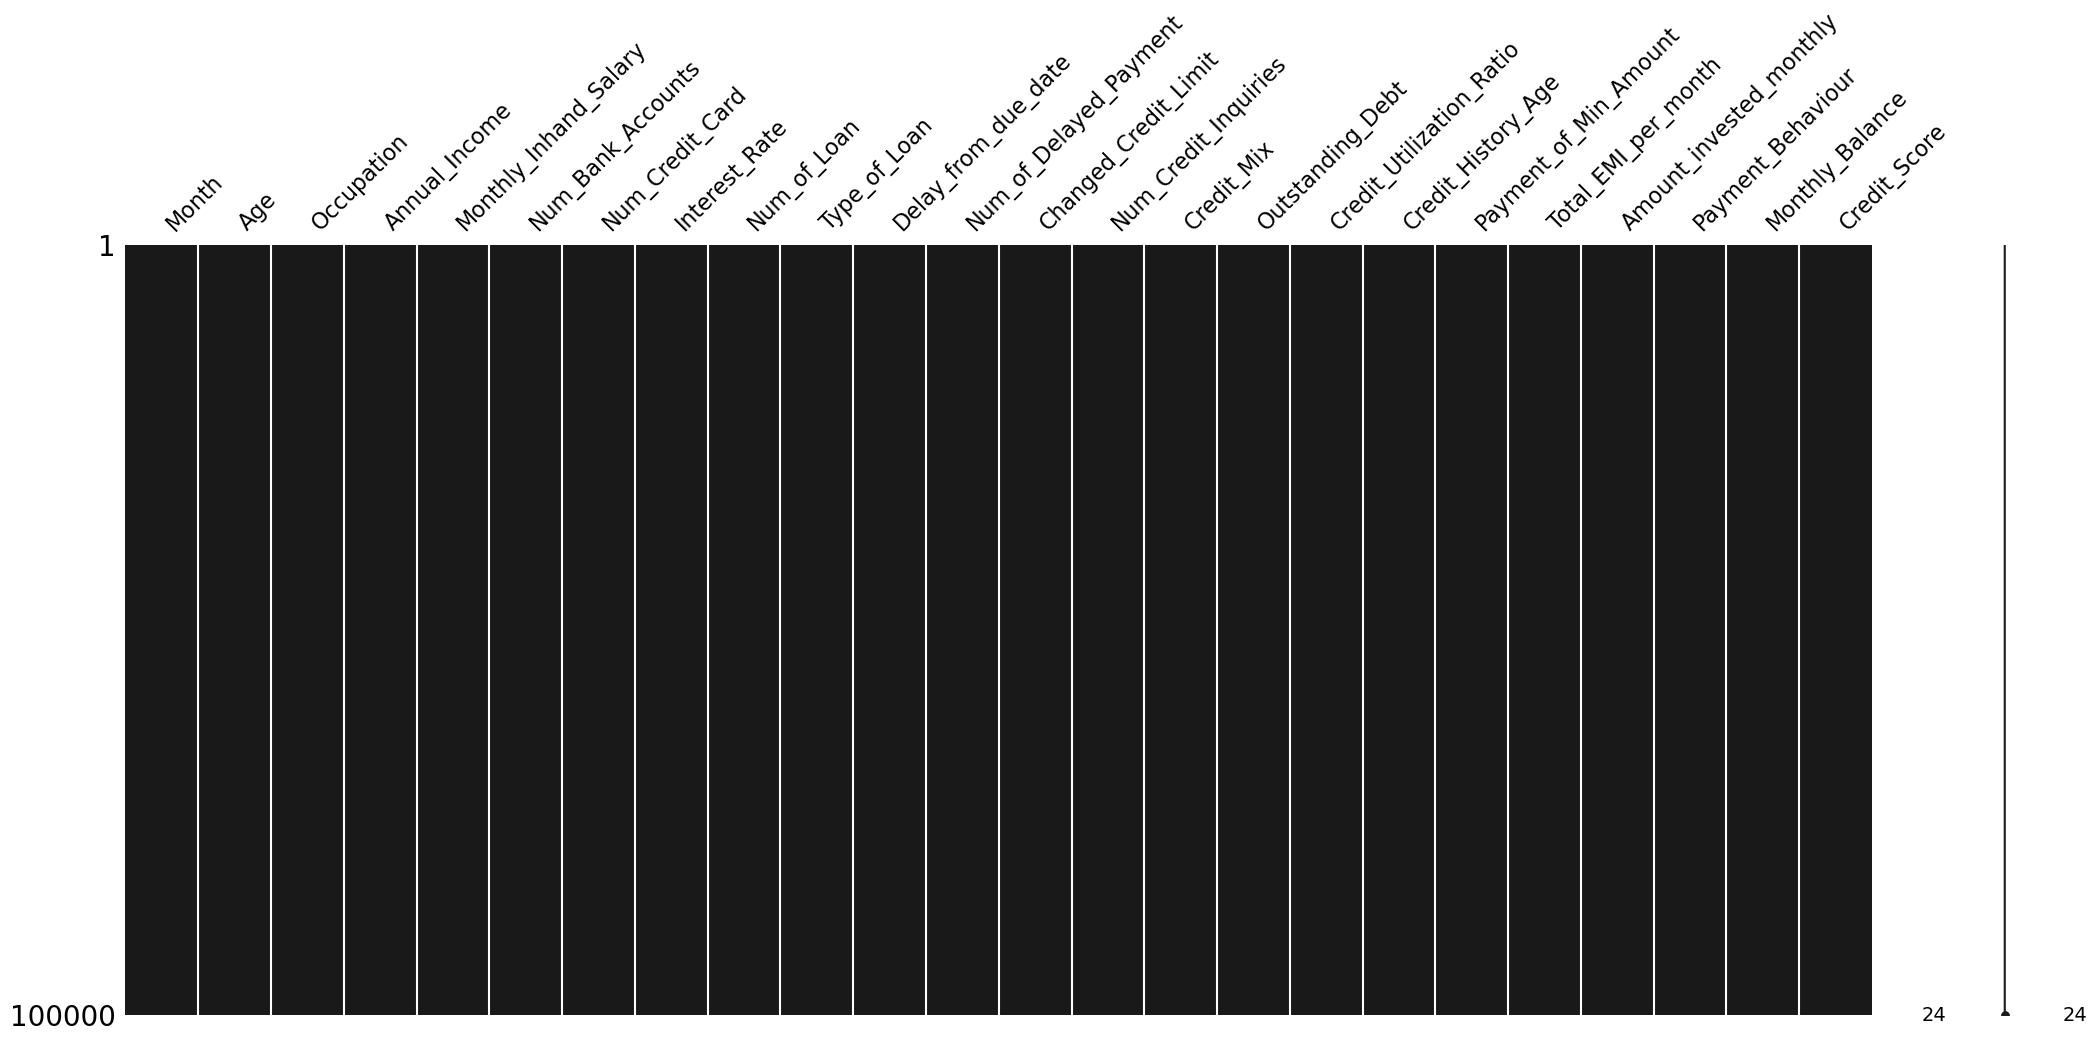

In [20]:
msno.matrix(df, color=(0.1, 0.1, 0.1))

# Outliers Treatment

In [21]:
def remove_outliers6(feature):
    global df
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.6)
    iqr = q3 - q1

    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)

    df = df.loc[(df[feature] < upper_limit) & (df[feature] > lower_limit)]
    
    
def remove_outliers7(feature):
    global df
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1

    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)

    df = df.loc[(df[feature] < upper_limit) & (df[feature] > lower_limit)]

In [22]:
outliers_list = ["Age", "Annual_Income", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate",
                 "Num_of_Loan", "Num_of_Delayed_Payment", "Changed_Credit_Limit", 
                 "Num_Credit_Inquiries", "Total_EMI_per_month"]

for feature in outliers_list:
    remove_outliers6(feature)

In [23]:
for feature in ["Monthly_Inhand_Salary", "Delay_from_due_date", "Outstanding_Debt",
                "Credit_Utilization_Ratio", "Amount_invested_monthly", "Monthly_Balance"]:
    remove_outliers7(feature)

# Encoding

In [24]:
encoder = LabelEncoder()

for i in df.select_dtypes(include="object").columns:
    df[i] = encoder.fit_transform(df[i])

# Correlation Matrix

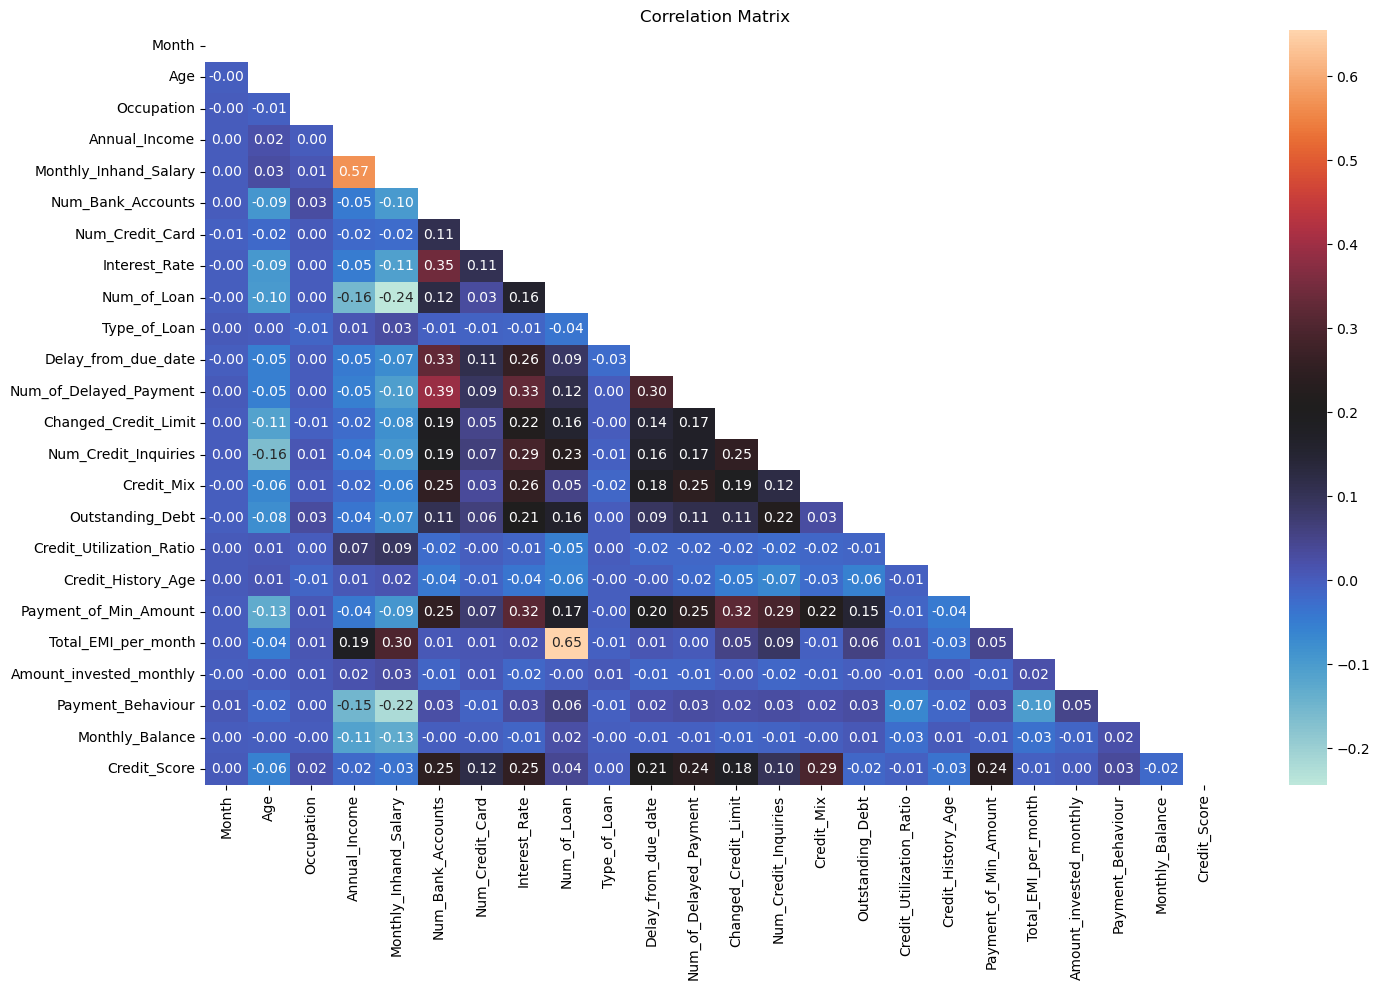

In [25]:
corr = df.corr()
mask_ut = np.triu(np.ones(corr.shape)).astype(np.bool_)

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="icefire", mask=mask_ut)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# Features Selection

In [38]:
X = df.drop("Credit_Score", axis=1)
y = df["Credit_Score"]

In [39]:
FeatureSelection = SelectKBest(score_func=f_classif ,k=17)
X = FeatureSelection.fit_transform(X, y)

# Handeling Inbalance Data

In [40]:
somte = SMOTE(random_state=42)

X, y = somte.fit_resample(X, y)

y.value_counts()

Credit_Score
0    17020
2    17020
1    17020
Name: count, dtype: int64

In [41]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

# Train Test Split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((40848, 17), (40848,), (10212, 17), (10212,))

# Model Building

In [43]:
def objective(trial):
    param = {
        'booster': 'gbtree',
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0),
    }

    model = XGBClassifier(**param)

    model.fit(x_train, y_train)

    preds = model.predict(x_test)
    accuracy = accuracy_score(y_test, preds)

    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

[I 2024-09-22 23:05:01,760] A new study created in memory with name: no-name-20db5e7a-87c5-4a5f-b559-bf2ece9b61ce
[I 2024-09-22 23:05:16,569] Trial 0 finished with value: 0.904719937328633 and parameters: {'learning_rate': 0.0513475281198955, 'n_estimators': 927, 'num_leaves': 125, 'max_depth': 7, 'min_child_samples': 98, 'subsample': 0.9202746174409786, 'colsample_bytree': 0.693353959686317, 'reg_alpha': 7.178160334547698, 'reg_lambda': 1.7518447375041708}. Best is trial 0 with value: 0.904719937328633.
[I 2024-09-22 23:05:20,026] Trial 1 finished with value: 0.7945554249902076 and parameters: {'learning_rate': 0.06942696098105722, 'n_estimators': 439, 'num_leaves': 51, 'max_depth': 3, 'min_child_samples': 35, 'subsample': 0.7354037195624619, 'colsample_bytree': 0.9027980496200938, 'reg_alpha': 9.45903915421822, 'reg_lambda': 0.5359549567221167}. Best is trial 0 with value: 0.904719937328633.
[I 2024-09-22 23:05:27,865] Trial 2 finished with value: 0.7217978848413631 and parameters: {

In [44]:
print("Best XGB Parameters: ", study.best_params)
print("Best LGBM Accuracy: ", study.best_value)

Best XGB Parameters:  {'learning_rate': 0.08612615393997917, 'n_estimators': 617, 'num_leaves': 105, 'max_depth': 9, 'min_child_samples': 84, 'subsample': 0.6774856829694852, 'colsample_bytree': 0.8504731480009575, 'reg_alpha': 0.03312290119796435, 'reg_lambda': 7.498179014139693}
Best LGBM Accuracy:  0.9124559341950647


In [45]:
xgb_param = study.best_params

clf = XGBClassifier(**xgb_param)

clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8504731480009575, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08612615393997917,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_samples=84, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=617,
              n_jobs=None, num_leaves=105, ...)

# Evaluation

In [46]:
y_pred = clf.predict(x_test)

In [47]:
print("Predictions Score: ", accuracy_score(y_test, y_pred) * 100)

Predictions Score:  91.24559341950646


In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      3404
           1       0.94      0.93      0.94      3404
           2       0.87      0.88      0.88      3404

    accuracy                           0.91     10212
   macro avg       0.91      0.91      0.91     10212
weighted avg       0.91      0.91      0.91     10212




Model Evaluation Summary:
Accuracy: 91.2

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      3404
           1       0.94      0.93      0.94      3404
           2       0.87      0.88      0.88      3404

    accuracy                           0.91     10212
   macro avg       0.91      0.91      0.91     10212
weighted avg       0.91      0.91      0.91     10212



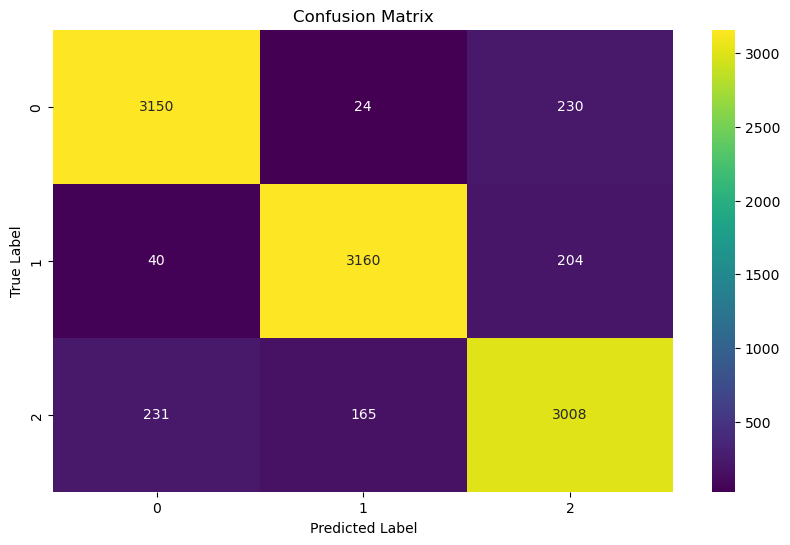

In [49]:
print("\nModel Evaluation Summary:")
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.1f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis')
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

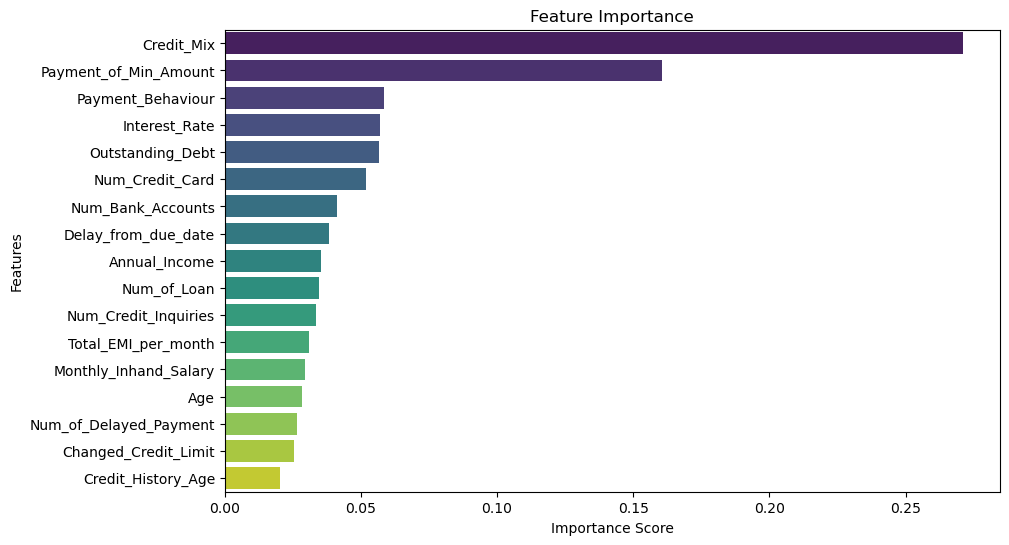

In [50]:
feature_importances = clf.feature_importances_
features = FeatureSelection.get_feature_names_out()

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Save The Model

In [51]:
import pickle

with open("credit_score_detection_model_91.2%.pkl", "wb") as file:
    pickle.dump(clf, file)